In [75]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
#importing the neccesary libraries for the task 
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\Riddhima\Desktop\globalterrorismdb_0718dist.csv',encoding='latin1')
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [76]:
df.shape

(181691, 135)

In [77]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [78]:
#Renaming the columns
df.rename(columns={
    'iyear': 'Year',
    'imonth': 'Month',
    'iday': 'Day',
    'country_txt': 'Country',
    'provstate': 'State',
    'region_txt': 'Region',
    'city': 'City',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'attacktype1_txt': 'AttackType',
    'targtype1_txt': 'TargetType',
    'targsubtype1_txt': 'TargetSubType',
    'weaptype1_txt': 'WeaponType',
    'gname': 'Group',
    'nkill': 'Killed',
    'nwound': 'Wounded',
    'summary': 'Summary',
    'motive': 'Motive'
}, inplace=True)

# Extracting Necessary Columns
df = df[['eventid', 'Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
         'Latitude', 'Longitude', 'AttackType', 'TargetType', 'TargetSubType',
         'suicide', 'Killed', 'Wounded', 'Summary', 'Group', 'WeaponType', 'Motive']]



In [79]:
df.head()

,eventid,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,TargetType,TargetSubType,suicide,Killed,Wounded,Summary,Group,WeaponType,Motive
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,0,1.0,0.0,NaN,MANO-D,Unknown,NaN
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0,0.0,0.0,NaN,23rd of September Communist League,Unknown,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,0,1.0,0.0,NaN,Unknown,Unknown,NaN
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Explosives,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Incendiary,NaN


In [80]:
df.describe()

,eventid,Year,Month,Day,Latitude,Longitude,suicide,Killed,Wounded
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.036507,2.403272,3.167668
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.187549,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,0.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000


Text(0, 0.5, 'Incidents')

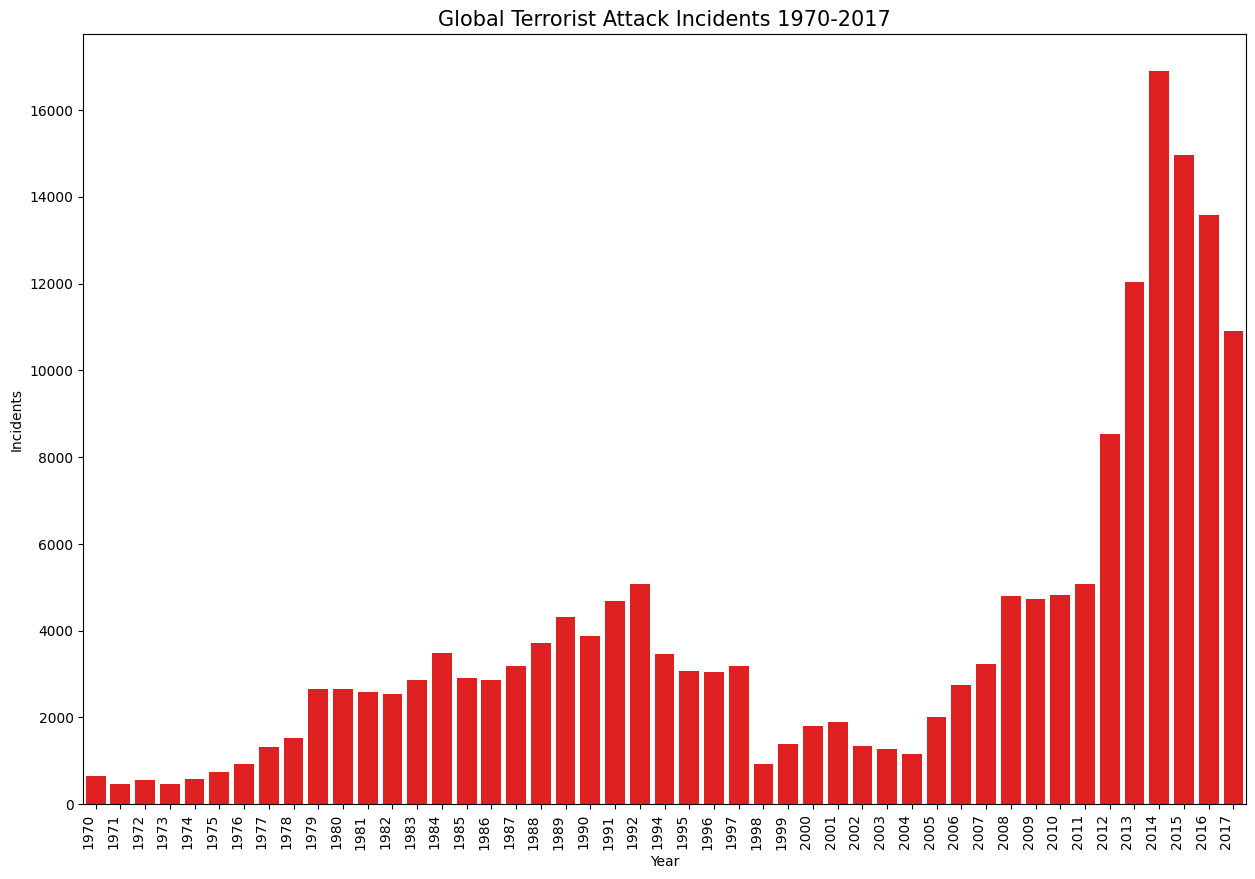

In [81]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Year',data=df,color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Global Terrorist Attack Incidents 1970-2017',size=15)
plt.ylabel('Incidents')

Text(0, 0.5, 'Count of Year')

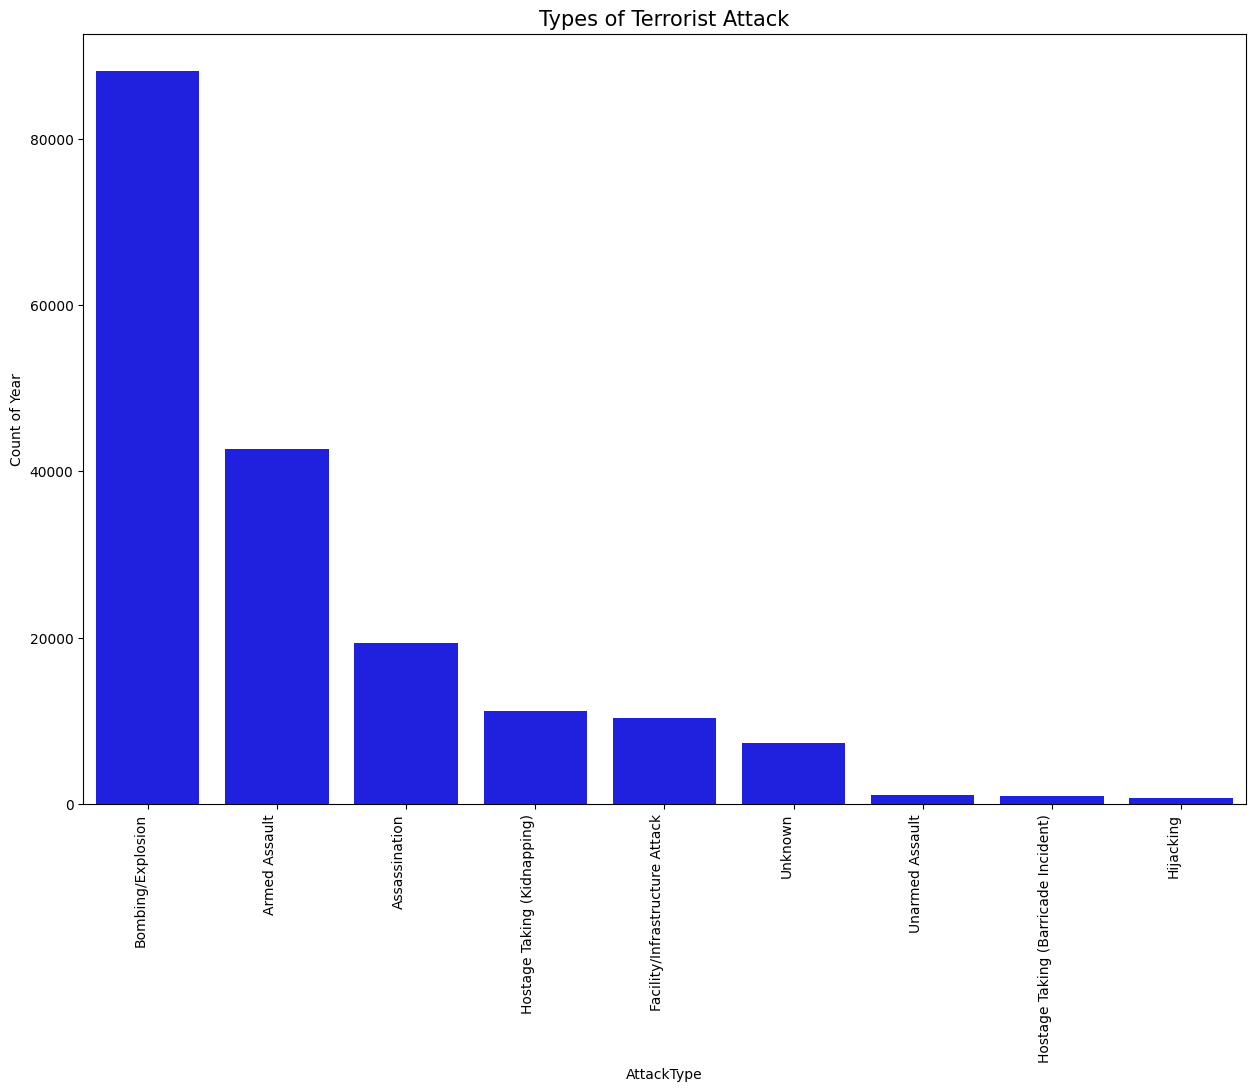

In [82]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='AttackType',data=df,color='blue',order = df['AttackType'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Types of Terrorist Attack',size=15)
plt.ylabel('Count of Year')

Text(-3.6805555555555483, 0.5, 'Incidents')

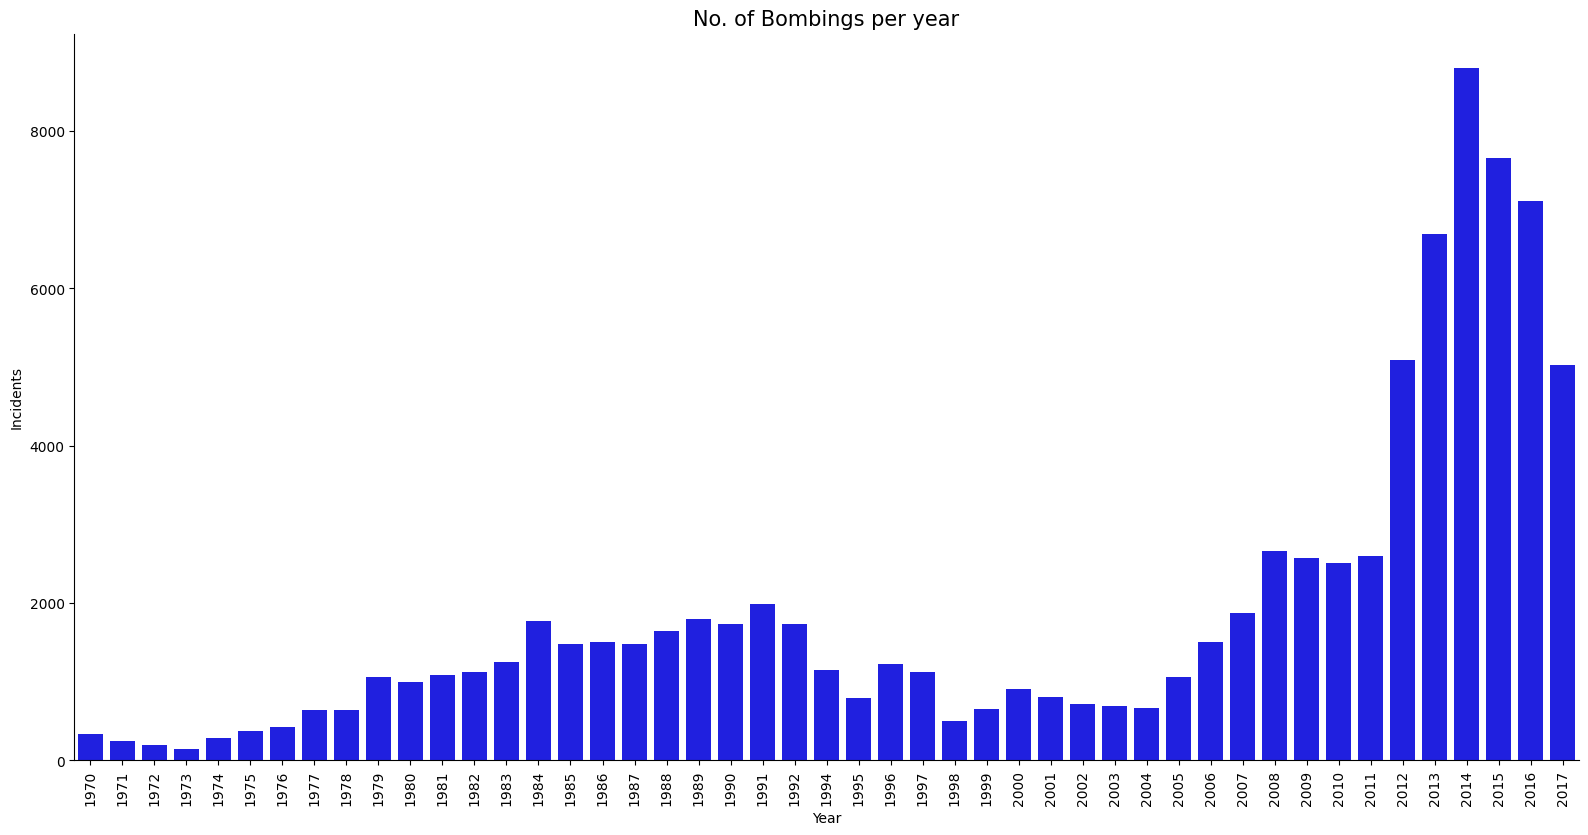

In [83]:
df_bombing = df[df['AttackType'] == 'Bombing/Explosion']
sns.catplot(x='Year',data=df_bombing,kind='count',height=8, aspect=2,color='blue')
plt.xticks(rotation=90)
plt.title('No. of Bombings per year',size=15)
plt.ylabel('Incidents')

Text(0, 0.5, 'No. of Attacks')

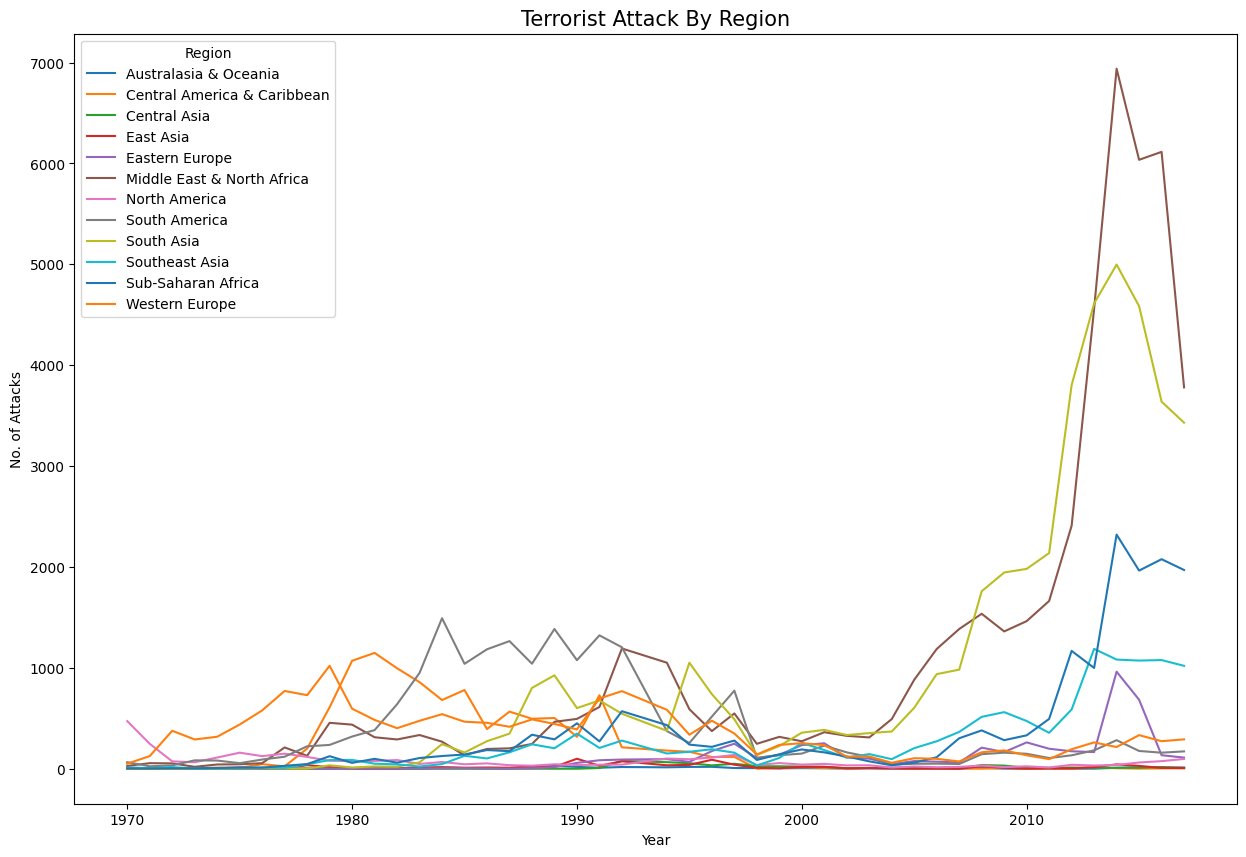

In [84]:
pd.crosstab(df.Year,df.Region).plot(figsize=(15,10))
plt.title('Terrorist Attack By Region',size=15)
plt.ylabel('No. of Attacks')

Text(0.5, 0, 'Type')

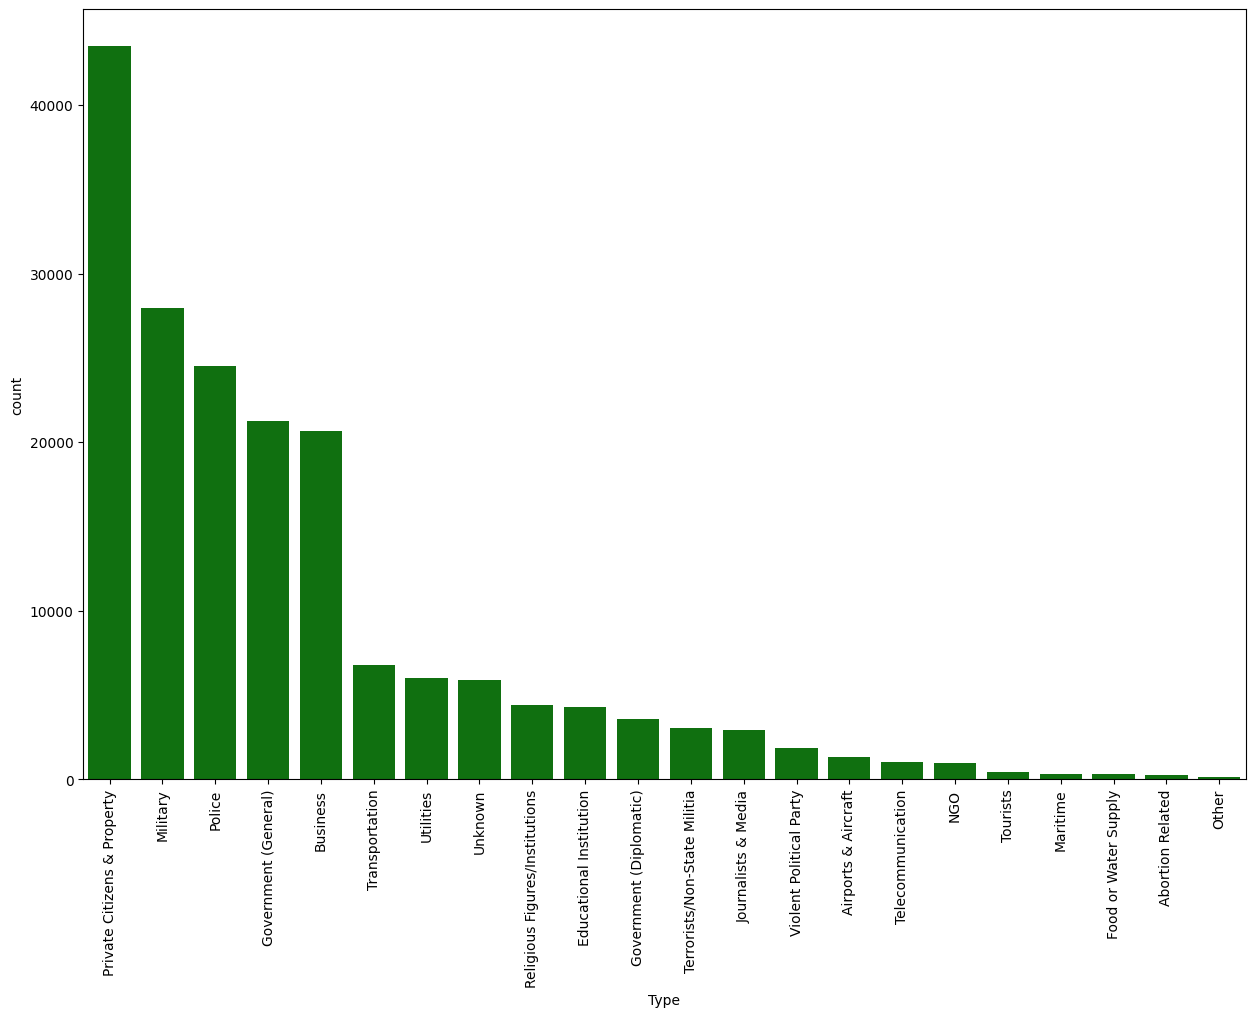

In [85]:
plt.figure(figsize=(15, 10))
sns.countplot(x='TargetType', data=df, order=df['TargetType'].value_counts().index,color='green')
plt.xticks(rotation=90)
plt.xlabel('Type')


Text(0.5, 1.0, 'Top-10:Total Attacks by Country')

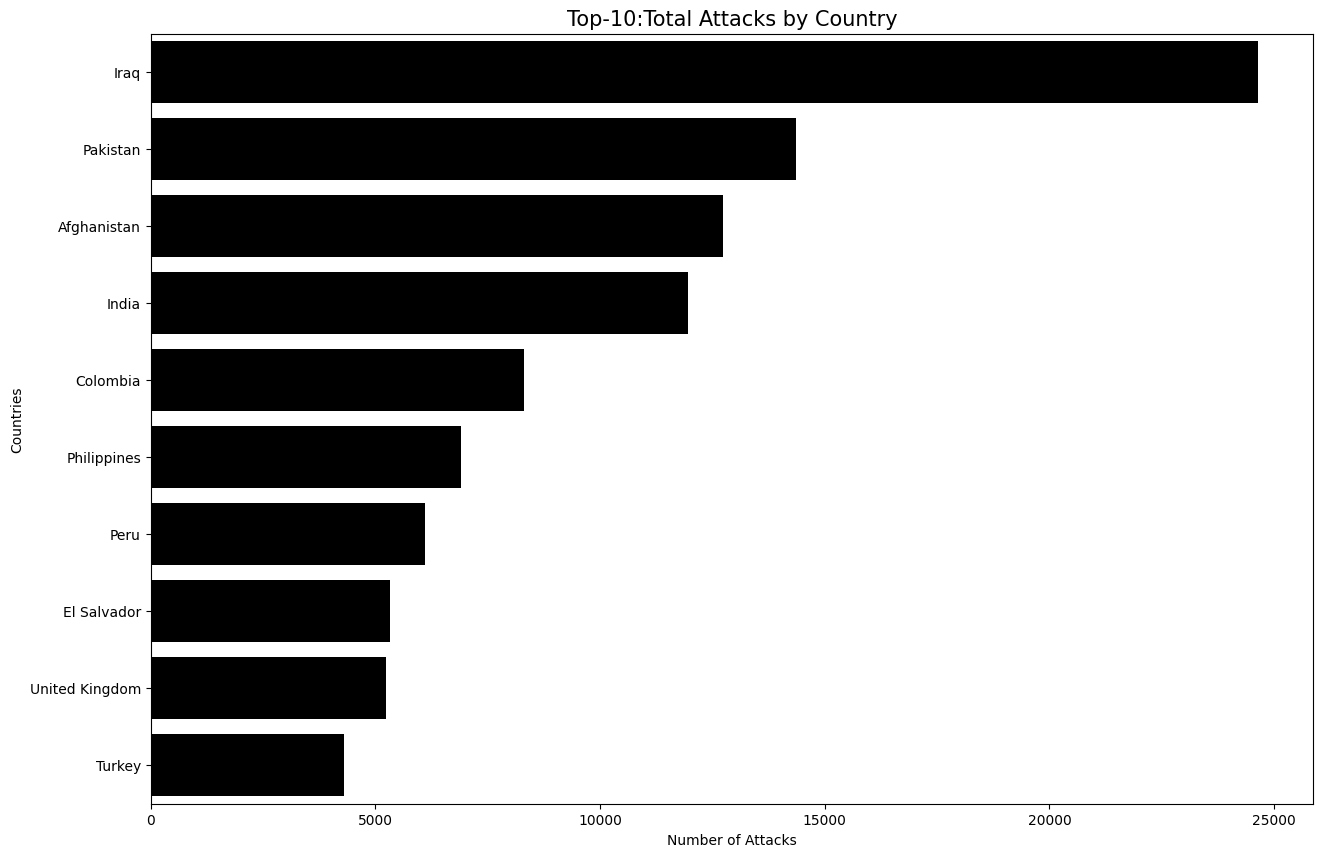

In [86]:
plt.figure(figsize=(15,10))
sns.barplot(x = df['Country'].value_counts().values[:10], y = df['Country'].value_counts()[:10].index,color ='black')
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.title('Top-10:Total Attacks by Country',size=15)

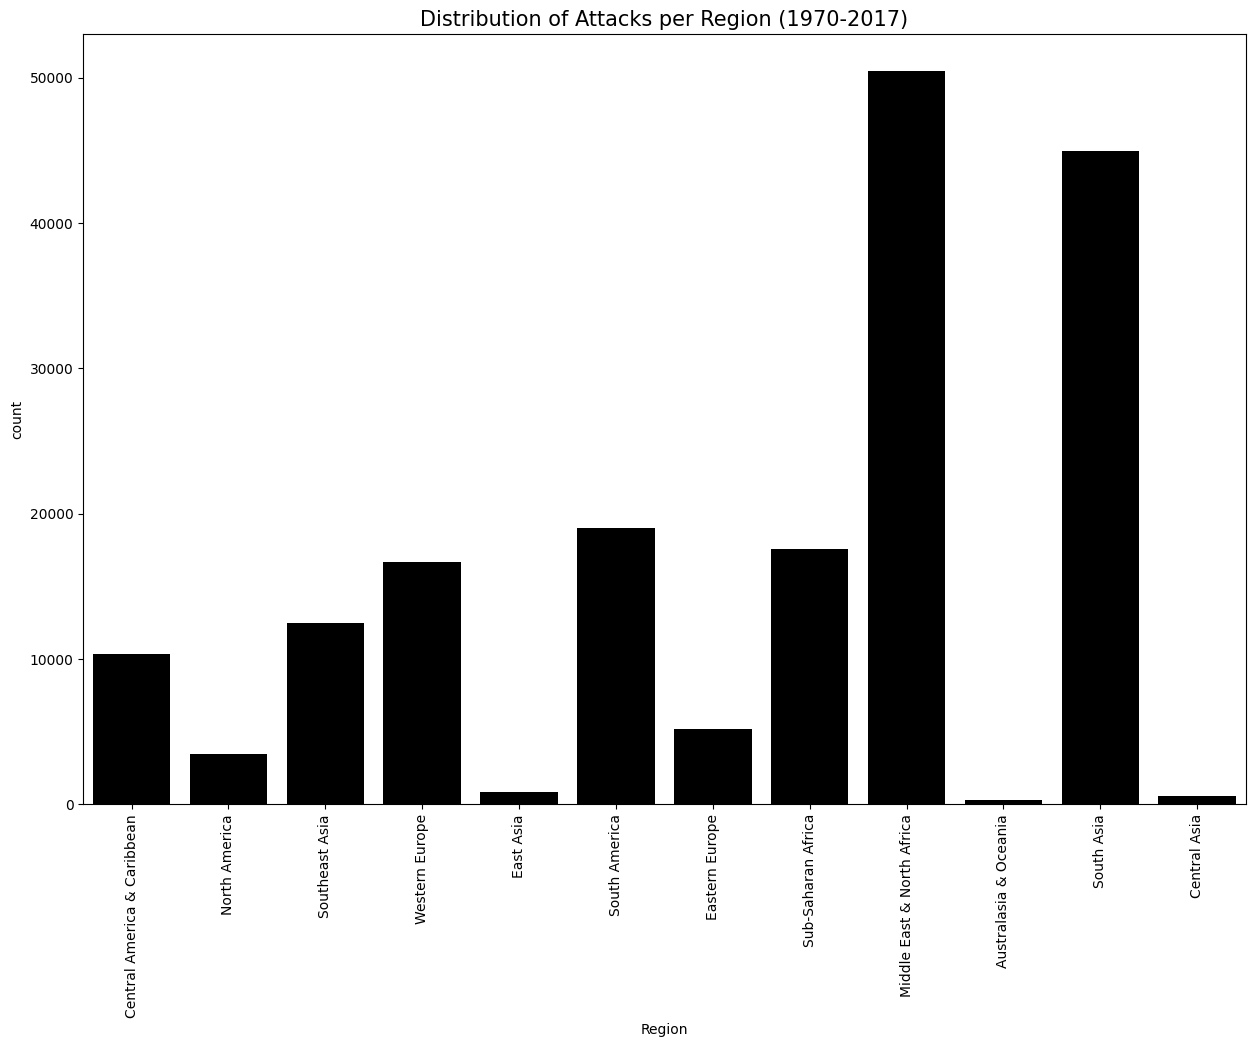

In [90]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='Region', data=df, color='black', ax=ax)
plt.xticks(rotation=90)
plt.title('Distribution of Attacks per Region (1970-2017)', size=15)
plt.show()


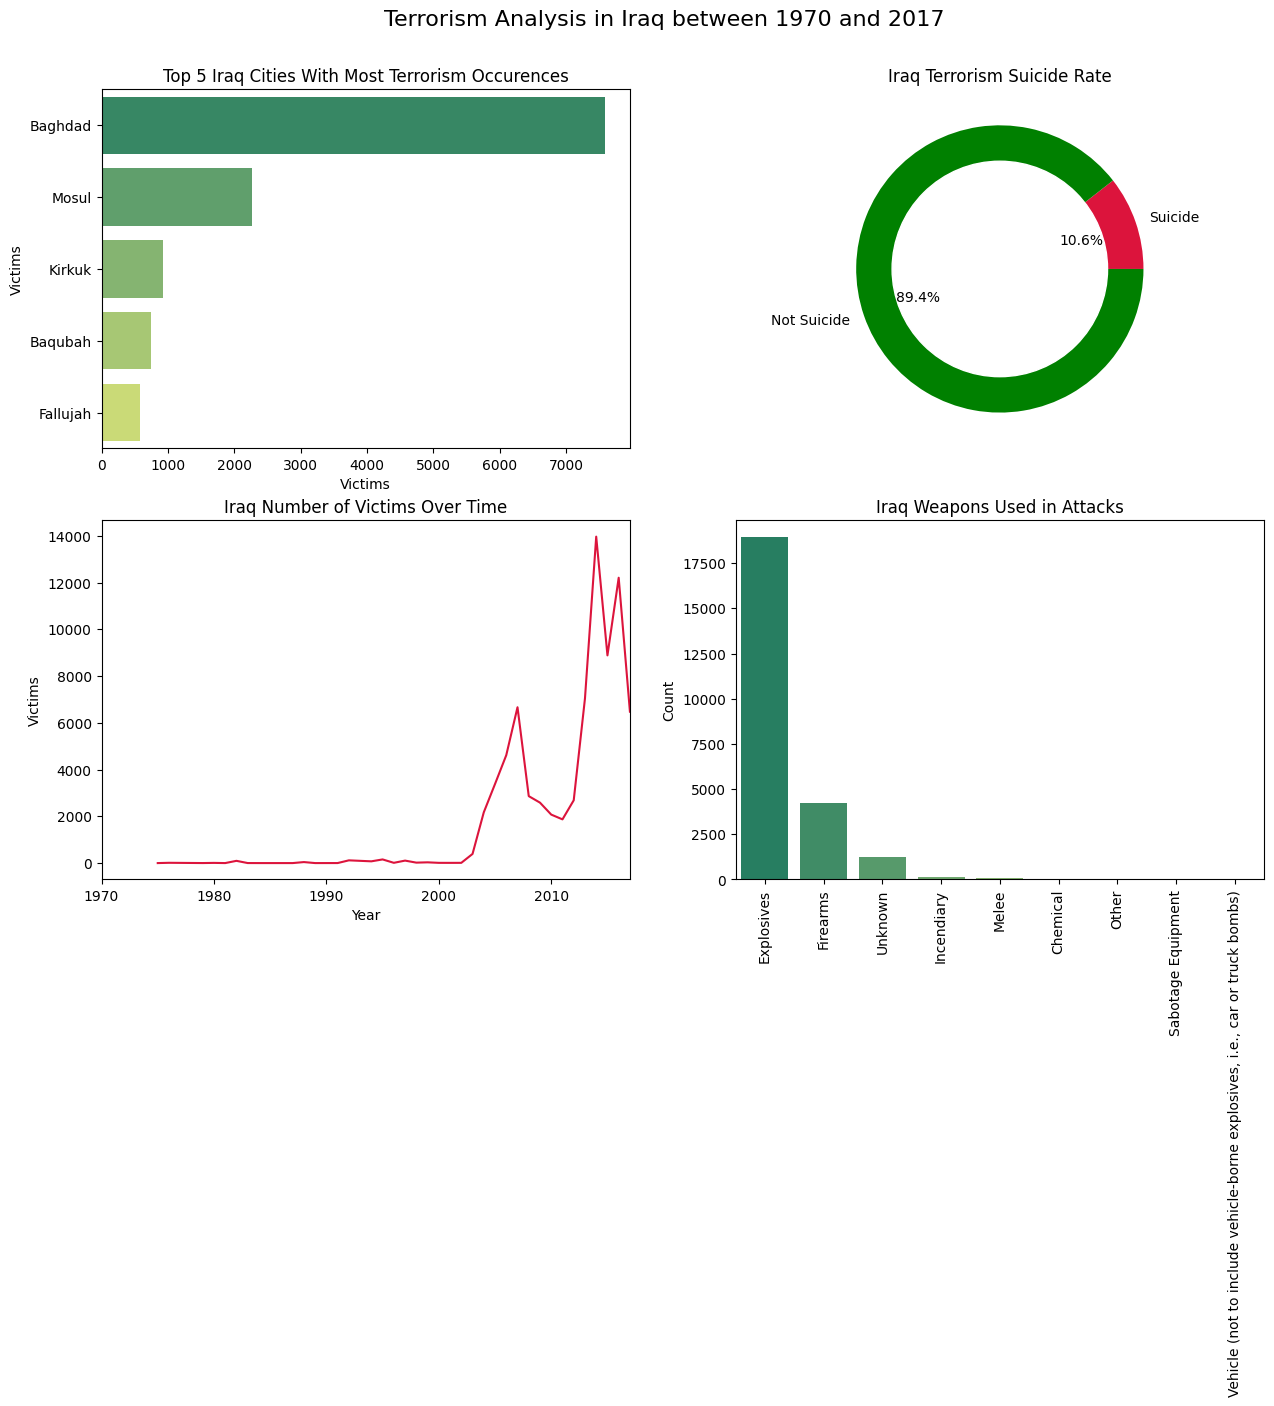

In [88]:
Iraq = df[df.Country == 'Iraq']
Iraq_cities = Iraq.groupby(by='City',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:5,]

Iraq_suicide_size = Iraq['suicide'].sum() / len(Iraq)
labels = ['Suicide', 'Not Suicide']

Iraq_year = Iraq.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

Iraq_weapon = Iraq.groupby(by='WeaponType',as_index=False).count().sort_values(by='eventid',ascending=False)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1 - Top 5 terrorism cities    
sns.barplot(x='eventid', y='City', data=Iraq_cities, ci=None, ax=axs[0, 0],palette='summer')
axs[0, 0].set_title(f'Top 5 Iraq Cities With Most Terrorism Occurences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Victims')

# Plot 2 - Suicide Rate
center_circle = plt.Circle((0,0), 0.75, color='white')
axs[0, 1].pie((Iraq_suicide_size, 1-Iraq_suicide_size), labels=labels,colors=['crimson','green'] , autopct='%1.1f%%')
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('Iraq Terrorism Suicide Rate')
axs[0, 0].set_ylabel('Victims')

# Plot 3 - Victims through the years
sns.lineplot(x='Year', y='Killed', data=Iraq_year, ax=axs[1, 0],color='crimson')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('Iraq Number of Victims Over Time')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons
sns.barplot(x='WeaponType', y='eventid', data=Iraq_weapon, ci=None, ax=axs[1, 1],palette='summer')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Iraq Weapons Used in Attacks')

plt.suptitle('Terrorism Analysis in Iraq between 1970 and 2017', size=16)    
plt.subplots_adjust(top=0.90)
plt.show()